## The Olympics EDA

In [1]:
from IPython.display import Image
from IPython.display import display
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

image_url = "https://getaround.com/blog/content/images/size/w1000/2024/05/2024-olympic-games-program-getaround.jpg"
display(Image(url=image_url))


In [2]:
df = pd.read_csv('dataset_olympics.csv' ,dayfirst=True)
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# The Olympics - Columns descreption
1. id = Athlete's serial number from zero onwards
2. name = Athlete's name
3. sex = Athlete's gender (M = male, F= female)
4. age = Athlete's age
5. height = Athlete's height (by centimeter)
6. weight = Athlete's whight
7. team = Athlete's countrey represent
8. NOC = Nickname of the country
9. games = witch olympics games
10. year = the olympics games year
11. season = the olympics games season (Summer or Winter)
12. city = The host city
13. sport = The sport type
14. event = The specipic event
15. medal = kind of medal (NaN / Gold / Silver / Bronze

In [3]:
df.columns ## checking if there incorrect names

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

**Cheking null values**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


In [5]:
null_percentage = df.isna().sum() / len(df) *100
print(null_percentage)

ID         0.000000
Name       0.000000
Sex        0.000000
Age        3.902857
Height    23.220000
Weight    24.430000
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     86.157143
dtype: float64


In [6]:
df['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [7]:
df['Medal']

0         NaN
1         NaN
2         NaN
3        Gold
4         NaN
         ... 
69995     NaN
69996     NaN
69997     NaN
69998     NaN
69999     NaN
Name: Medal, Length: 70000, dtype: object

**The system reads NaN as null value, i need to replace the NaN values to NoMedal values**

In [8]:
# Replace NaN values in the 'Medal' column with 'NoMedal'
df['Medal'] = df['Medal'].fillna('NoMedal')
print(df['Medal'])

0        NoMedal
1        NoMedal
2        NoMedal
3           Gold
4        NoMedal
          ...   
69995    NoMedal
69996    NoMedal
69997    NoMedal
69998    NoMedal
69999    NoMedal
Name: Medal, Length: 70000, dtype: object


In [9]:
df['Weight'].describe()

count    52899.000000
mean        70.900216
std         14.217489
min         25.000000
25%         61.000000
50%         70.000000
75%         79.000000
max        214.000000
Name: Weight, dtype: float64

In [10]:
null_percentage = df.isna().sum() / len(df) *100
print(null_percentage)
#checking the Medal null values

ID         0.000000
Name       0.000000
Sex        0.000000
Age        3.902857
Height    23.220000
Weight    24.430000
Team       0.000000
NOC        0.000000
Games      0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal      0.000000
dtype: float64


**handlling null values by replace null values to the mean's values**

In [11]:
mean_age = df['Age'].mean()
df['Age'] = df['Age'].fillna(mean_age)

In [12]:
mean_height = df['Height'].mean()
df['Height'] = df['Height'].fillna(mean_height)

In [13]:
mean_weight = df['Weight'].mean()
df['Weight'] = df['Weight'].fillna(mean_weight)

In [14]:
df['Weight'].describe()

count    70000.000000
mean        70.900216
std         12.359378
min         25.000000
25%         64.000000
50%         70.900216
75%         75.000000
max        214.000000
Name: Weight, dtype: float64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     70000 non-null  float64
 4   Height  70000 non-null  float64
 5   Weight  70000 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   70000 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


**droping 2 unnecessary's columns**

In [16]:
df = df.drop(['NOC','Games'], axis = 1)

In [17]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.000000,80.000000,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NoMedal
1,2,A Lamusi,M,23.0,170.000000,60.000000,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NoMedal
2,3,Gunnar Nielsen Aaby,M,24.0,175.505303,70.900216,Denmark,1920,Summer,Antwerpen,Football,Football Men's Football,NoMedal
3,4,Edgar Lindenau Aabye,M,34.0,175.505303,70.900216,Denmark/Sweden,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NoMedal


In [18]:
mask_year = df['Year'] >= 1996
df[mask_year]

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NoMedal
28,9,Antti Sami Aalto,M,26.0,186.0,96.0,Finland,2002,Winter,Salt Lake City,Ice Hockey,Ice Hockey Men's Ice Hockey,NoMedal
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NoMedal
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NoMedal
33,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NoMedal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69989,35653,Casey J. FitzRandolph,M,27.0,180.0,79.0,United States,2002,Winter,Salt Lake City,Speed Skating,"Speed Skating Men's 1,000 metres",NoMedal
69990,35653,Casey J. FitzRandolph,M,31.0,180.0,79.0,United States,2006,Winter,Torino,Speed Skating,Speed Skating Men's 500 metres,NoMedal
69991,35653,Casey J. FitzRandolph,M,31.0,180.0,79.0,United States,2006,Winter,Torino,Speed Skating,"Speed Skating Men's 1,000 metres",NoMedal
69993,35655,Riley Fitzsimmons,M,20.0,192.0,93.0,Australia,2016,Summer,Rio de Janeiro,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",NoMedal


**1996-2000-2004-2008-2012-2016 : Summer olympics**  
**1998-2002-2006-2008-2010-2014 : Winter olympics**

<AxesSubplot:title={'center':'Number of Athlets by Gender'}, xlabel='Year', ylabel='Number of Athlets'>

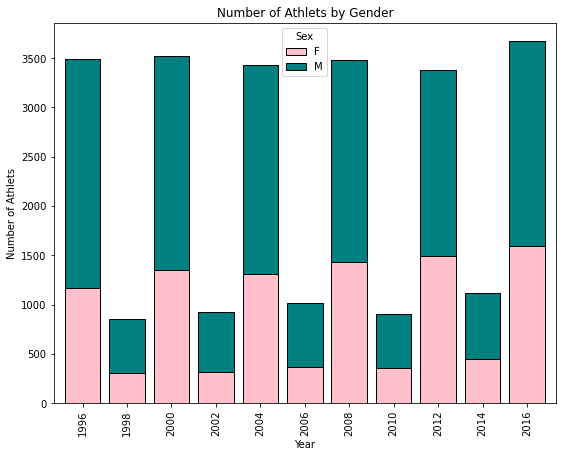

In [19]:
pt = df[mask_year].pivot_table(index = 'Year', columns = 'Sex',values = 'ID', aggfunc = 'count')
pt.plot.bar(width = 0.8,
           color = ('pink','teal'),
            edgecolor = 'black',
            figsize = (9,7),
            stacked = True,
            xlabel = 'Year',
            ylabel = 'Number of Athlets',
            title = 'Number of Athlets by Gender')

In [20]:
mask_medal = df['Medal'] != 'NoMedal'
mask_medal_year = (df['Year'] >= 1996) & mask_medal
df[mask_medal_year]

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.000000,Finland,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
73,20,Kjetil Andr Aamodt,M,30.0,176.0,85.000000,Norway,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Super G,Gold
76,20,Kjetil Andr Aamodt,M,30.0,176.0,85.000000,Norway,2002,Winter,Salt Lake City,Alpine Skiing,Alpine Skiing Men's Combined,Gold
78,20,Kjetil Andr Aamodt,M,34.0,176.0,85.000000,Norway,2006,Winter,Torino,Alpine Skiing,Alpine Skiing Men's Super G,Gold
79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,70.900216,Norway,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69835,35565,Mardy Simpson Fish,M,22.0,187.0,81.000000,United States,2004,Summer,Athina,Tennis,Tennis Men's Singles,Silver
69875,35594,Sari Kristiina Fisk,F,26.0,163.0,65.000000,Finland,1998,Winter,Nagano,Ice Hockey,Ice Hockey Women's Ice Hockey,Bronze
69912,35614,Doris Fitschen,F,31.0,175.0,64.000000,Germany,2000,Summer,Sydney,Football,Football Women's Football,Bronze
69983,35651,Theresa Matauaina Fitzpatrick,F,21.0,168.0,75.000000,New Zealand,2016,Summer,Rio de Janeiro,Rugby Sevens,Rugby Sevens Women's Rugby Sevens,Silver


**cheking the mean age and weight to winning a  medal**

In [21]:
df[mask_medal_year]['Age'].describe()

count    3382.000000
mean       26.318746
std         5.130373
min        14.000000
25%        23.000000
50%        26.000000
75%        29.000000
max        56.000000
Name: Age, dtype: float64

In [22]:
df[mask_medal_year]['Weight'].describe()

count    3382.000000
mean       73.618315
std        15.702343
min        32.000000
25%        63.000000
50%        72.000000
75%        83.000000
max       170.000000
Name: Weight, dtype: float64

Text(0.5, 1.0, 'Distribution of Weight')

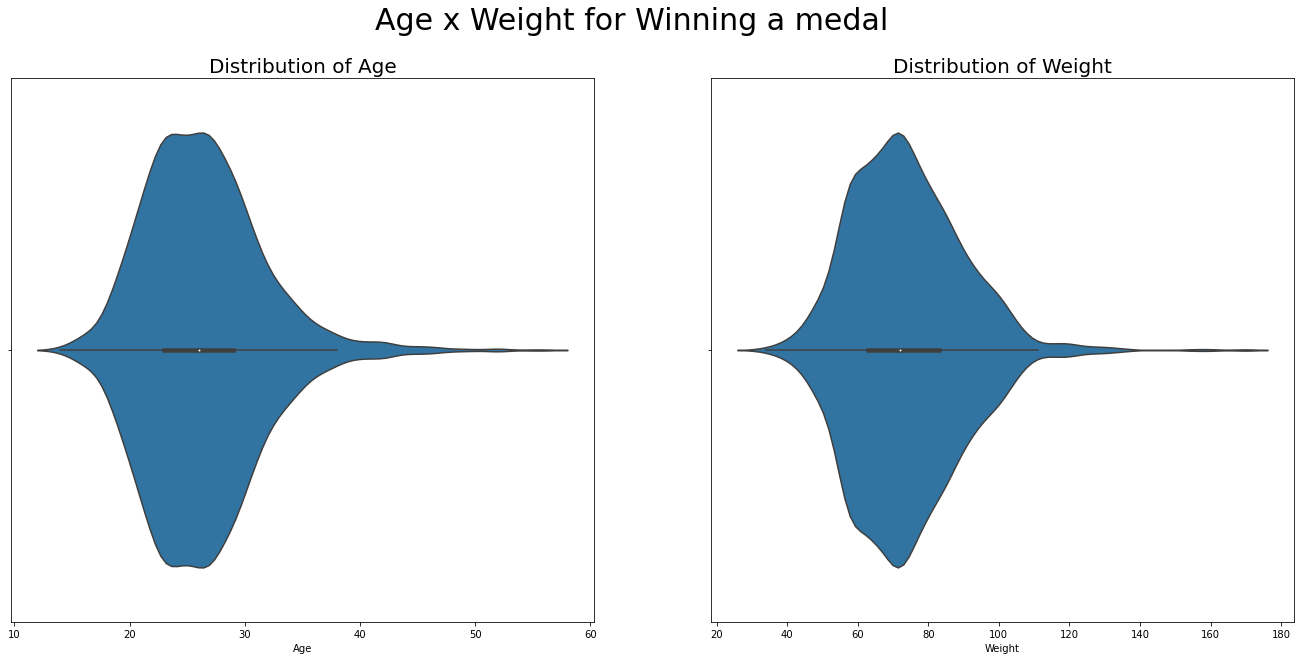

In [23]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (23, 10))
fig.suptitle("Age x Weight for Winning a medal", fontsize = 30)
sns.violinplot(x=df[mask_medal_year]['Age'], ax=axes[0])
axes[0].set_title('Distribution of Age', fontsize=20)
sns.violinplot(x=df[mask_medal_year]['Weight'], ax=axes[1])
axes[1].set_title('Distribution of Weight', fontsize=20)

In [24]:
mask_sport = df['Sport'] == 'Football'
mask_year_sport = (df['Year'] >= 1996) & mask_sport
mask_year_sport_medal = (df['Medal'] != 'NoMedal') & mask_year_sport
df[mask_year_sport_medal]

,ID,Name,Sex,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
105,37,Ann Kristin Aarnes,F,23.0,182.0,64.0,Norway,1996,Summer,Atlanta,Football,Football Women's Football,Bronze
178,76,Jouan Patrice Abanda Etong,M,22.0,185.0,82.0,Cameroon,2000,Summer,Sydney,Football,Football Men's Football,Gold
1276,716,Lautaro Germn Acosta,M,20.0,168.0,72.0,Argentina,2008,Summer,Beijing,Football,Football Men's Football,Gold
1617,896,Olubayo Adefemi,M,22.0,181.0,82.0,Nigeria,2008,Summer,Beijing,Football,Football Men's Football,Silver
1637,908,"Ayodele ""Dele"" Adeleye",M,19.0,190.0,80.0,Nigeria,2008,Summer,Beijing,Football,Football Men's Football,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68693,35062,Jordi Ferrn Forn,M,22.0,181.0,78.0,Spain,2000,Summer,Sydney,Football,Football Men's Football,Silver
69105,35234,Diego Antonio Figueredo Matiauda,M,22.0,185.0,75.0,Paraguay,2004,Summer,Athina,Football,Football Men's Football,Silver
69260,35302,Jonelle Filigno,F,21.0,169.0,58.0,Canada,2012,Summer,London,Football,Football Women's Football,Bronze
69737,35526,sa Nilla Maria Fischer,F,32.0,176.0,68.0,Sweden,2016,Summer,Rio de Janeiro,Football,Football Women's Football,Silver


In [25]:
mask_male = df[mask_year_sport_medal]['Sex'] == 'M'
mask_female = df[mask_year_sport_medal]['Sex'] == 'F'

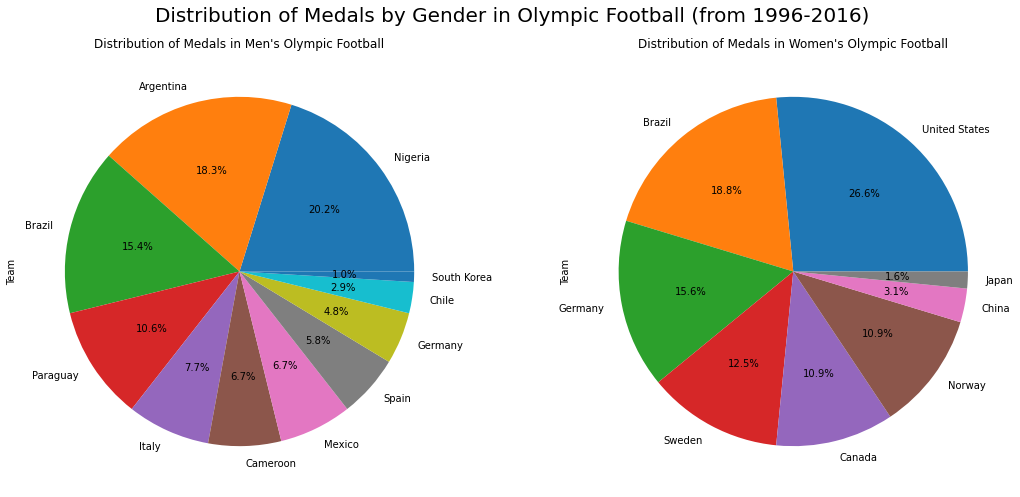

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

df[mask_year_sport_medal & mask_male]['Team'].value_counts().plot.pie(
    ax=axes[0],
    autopct='%1.1f%%',
    title='Distribution of Medals in Men\'s Olympic Football'
)

df[mask_year_sport_medal & mask_female]['Team'].value_counts().plot.pie(
    ax=axes[1],
    autopct='%1.1f%%',
    title='Distribution of Medals in Women\'s Olympic Football'
)
fig.suptitle('Distribution of Medals by Gender in Olympic Football (from 1996-2016)', fontsize=20)

plt.tight_layout()
plt.show()

**U.S.A medal distribution since 1996**

<AxesSubplot:title={'center':'Number of Medals by United States'}, xlabel='Year', ylabel='Number of Medals'>

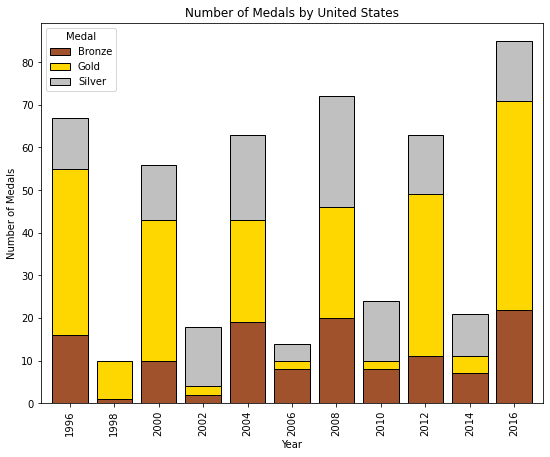

In [27]:
mask_medal_year_gold = (df['Team'] == 'United States') & mask_medal_year
pt = df[mask_medal_year_gold].pivot_table(index='Year', columns='Medal', values='ID', aggfunc='count')
pt.plot.bar(
    width=0.8,
    color=('#A0522D','#ffd700','#c0c0c0'),
    edgecolor=('black'),
    figsize=(9, 7),
    stacked=True,
    xlabel='Year',
    ylabel='Number of Medals',
    title='Number of Medals by United States'
)
